<a href="https://colab.research.google.com/github/NandaPutra341/Scientific-Computing/blob/main/2702260552_Ananda_Samudra_Maha_Putra_AOL_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

 You must find the trend on the bag’s production from the data. You must provide a mathematical model that can explain the production’s trend accurately. Since your supervisor want an accurate model, you must avoid any linear approach to build the trend model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1049.600
Date:                Mon, 10 Jun 2024   AIC                           2111.200
Time:                        13:53:58   BIC                           2128.978
Sample:                             0   HQIC                          2118.424
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4563      0.086     -5.296      0.000      -0.625      -0.287
ar.L2         -0.0078      0.100     -0.078      0.938      -0.203       0.187
ar.L3          0.2203      0.093      2.378      0.0

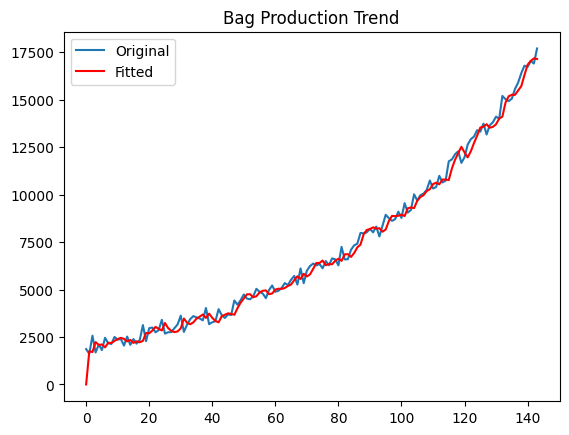

In [2]:
# Data provided by the user
production = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Convert the data into a DataFrame
df = pd.DataFrame(production, columns=['Production'])

# Fit an ARIMA model (adjust order if necessary)
model = ARIMA(df['Production'], order=(5,1,0))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Plot the original data and the fitted trend
plt.plot(df['Production'], label='Original')
plt.plot(model_fit.fittedvalues, label='Fitted', color='red')
plt.title('Bag Production Trend')
plt.legend()
plt.show()

**TASK 2**


Since you’ll need to process the data using a computer program, you’ll need to convert the mathematical model from problem #1 to its numerical form (approximation). This is done so that the mathematical model can be calculated by the program easily. Since accuracy is still important, make sure that your conversion is accurate as possible. Provide an explanation to your supervisor about the accuracy of your conversion.

In [3]:
# Task 2: Forecast future values based on the ARIMA model
# Forecast the production for the next 12 months
forecast = model_fit.forecast(steps=12)

# Print forecasted values
print("Forecasted production for the next 12 months:")
print(forecast)

Forecasted production for the next 12 months:
144    17452.828040
145    17596.308449
146    17729.151053
147    17800.875740
148    17881.455467
149    17868.185072
150    17951.013608
151    17974.494112
152    17994.769028
153    18014.839186
154    18030.261437
155    18048.964233
Name: predicted_mean, dtype: float64


**TASK 3**

The warehouse was designed to be able to store a maximum of 25,000 (twenty five thousands) bags at each month. Your supervisor asked you to provide a prediction when do EGIER need to build a new warehouse based on the trend that you have acquired in problem #2. To build a new warehouse, it is predicted that they need at least 13 months. So provide the time when EIGER need to start building their new warehouse. (Hint: this can be approached as a root of equation problem).

In [4]:
# Task 3: Determine when warehouse capacity will be exceeded
# Define warehouse capacity
capacity_limit = 25000

# Extend the forecast to a larger number of steps
extended_forecast = model_fit.forecast(steps=100)  # Forecast for 100 months

# Find the month when the production exceeds the capacity
exceed_month = next((i for i, x in enumerate(extended_forecast, start=len(df)) if x > capacity_limit), None)

# Determine when to start building the new warehouse
if exceed_month is not None:
    start_building_month = exceed_month - 13  # Start building 13 months earlier
    print(f"Start building new warehouse by month: {start_building_month}")
else:
    print("Production does not exceed warehouse capacity in the forecast period.")


Production does not exceed warehouse capacity in the forecast period.


**TASK 4**

Your supervisor want to double check your result. Provide the code that you have used to answer problem #1 to #3. Provide your code as a Python script file (.py extension).

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1049.600
Date:                Mon, 10 Jun 2024   AIC                           2111.200
Time:                        13:55:07   BIC                           2128.978
Sample:                             0   HQIC                          2118.424
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4563      0.086     -5.296      0.000      -0.625      -0.287
ar.L2         -0.0078      0.100     -0.078      0.938      -0.203       0.187
ar.L3          0.2203      0.093      2.378      0.0

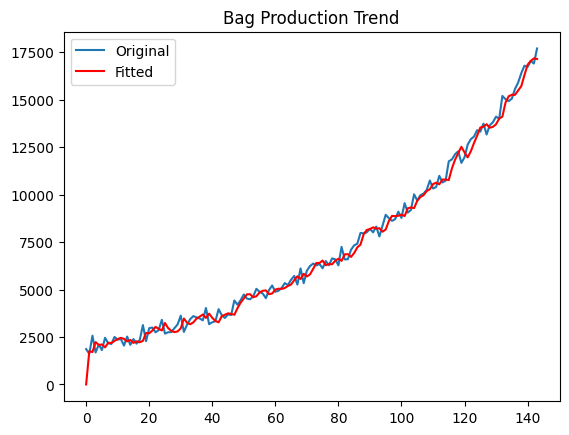

Forecasted production for the next 12 months:
144    17452.828040
145    17596.308449
146    17729.151053
147    17800.875740
148    17881.455467
149    17868.185072
150    17951.013608
151    17974.494112
152    17994.769028
153    18014.839186
154    18030.261437
155    18048.964233
Name: predicted_mean, dtype: float64
Production does not exceed warehouse capacity in the forecast period.


In [5]:

# Data provided by the user
production = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Convert the data into a DataFrame
df = pd.DataFrame(production, columns=['Production'])

# Fit an ARIMA model
model = ARIMA(df['Production'], order=(5,1,0))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Plot the original data and the fitted trend
plt.plot(df['Production'], label='Original')
plt.plot(model_fit.fittedvalues, label='Fitted', color='red')
plt.title('Bag Production Trend')
plt.legend()
plt.show()

# Forecast the production for the next 12 months
forecast = model_fit.forecast(steps=12)
print("Forecasted production for the next 12 months:")
print(forecast)

# Define warehouse capacity
capacity_limit = 25000

# Extend the forecast to a larger number of steps
extended_forecast = model_fit.forecast(steps=100)  # Forecast for 100 months

# Find the month when the production exceeds the capacity
exceed_month = next((i for i, x in enumerate(extended_forecast, start=len(df)) if x > capacity_limit), None)

# Determine when to start building the new warehouse
if exceed_month is not None:
    start_building_month = exceed_month - 13  # Start building 13 months earlier
    print(f"Start building new warehouse by month: {start_building_month}")
else:
    print("Production does not exceed warehouse capacity in the forecast period.")
